## Dados - Origem arquivos HTML's

---



In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dados - Seta se vai usar caminho Local/Ou Não

In [ ]:
# True  => LOCAL Desktop
# False => colab
isPathLocal = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
if isPathLocal:
    path = 'D:\\2. Ciência de Dados\\1. Trabalho de Conclusão\\Dados\\NPS - Suporte\\NPS - Suporte - HTML\\01 - TELEFONE - JANEIRO.html'
else:
    path = '/content/drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/NPS - Suporte/NPS - Suporte - HTML/01 - TELEFONE - JANEIRO.html'

In [ ]:
path

'/content/drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/NPS - Suporte/NPS - Suporte - HTML/01 - TELEFONE - JANEIRO.html'

In [ ]:
df = pd.read_html(path)

In [ ]:
type(df)

list

In [ ]:
df[0]

,0,1,2,3
0,RequisiÃ§Ã£o,Nota,ObservaÃ§Ã£o,ResponsÃ¡vel
1,277910,10,Qualidade do Atendimento e Pos Vendas,Matheus Alves Bandeira
2,277969,10,Fui bem atendida e o Murilo tentou de todas as...,Murillo de Souza Rodrigues
3,277954,10,otimo atendimento sem problemas e agilidade,Thailene Terra
4,278018,10,Fui prontamente atendido e o que precisava foi...,Matheus Alves Bandeira
...,...,...,...,...
1193,285787,10,NaN,Lucas do Carmo Ferreira
1194,287058,10,NaN,Mattheus Faleiro
1195,278482,10,NaN,Leonardo Ferreira Rodrigues
1196,287914,10,NaN,Mattheus Faleiro


In [ ]:
if isPathLocal:
    path_root = 'D:\\2. Ciência de Dados\\1. Trabalho de Conclusão\\Dados\\NPS - Suporte\\NPS - Suporte - HTML\\'
else:
    path_root = '/content/drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/NPS - Suporte/NPS - Suporte - HTML/'

In [ ]:
# Obtem os arquivos na pasta
if isPathLocal:
    files = os.listdir('D:\\2. Ciência de Dados\\1. Trabalho de Conclusão\\Dados\\NPS - Suporte\\NPS - Suporte - HTML\\')
else:
    files = os.listdir("./drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/NPS - Suporte/NPS - Suporte - HTML/")

In [ ]:
# https://www.kite.com/python/answers/how-to-save-a-pandas-dataframe-in-python

In [ ]:
list_dfs = []

for file in files:
  path_full = path_root + file
  df = pd.DataFrame(pd.read_html(path_full)[0])
  month = file.split(' - ')[2].replace('.html', '')
  # print(month)
  # print(type(df))
  #print(df.shape)

  df['Mês'] = pd.Series([month for x in range(df.shape[0])])

  #print(df.shape)
  #print(df[0:-1])

  # DROPA a primeira linha, que contem => Requisição	Nota	Observação Responsável
  df.drop(df.index[[0]], inplace=True)

  list_dfs.append(df)

  #break  

In [ ]:
# Junta todos os dataframes
df_full = pd.concat(list_dfs)

In [ ]:
df_full.shape

(15970, 5)

In [ ]:
# Renomear as colunas
df_full.columns = ['Requisição', 'Nota', 'Comentário', 'Responsável', 'Mês']

In [ ]:
df_full

,Requisição,Nota,Comentário,Responsável,Mês
1,435362,10,NaN,Luis Henrique de Oliveira,NOVEMBRO
2,439607,10,NaN,Cesar Missio Nunes,NOVEMBRO
3,428223,10,NaN,JoÃ£o Pedro Medeiros,NOVEMBRO
4,439630,10,NaN,Luis Henrique de Oliveira,NOVEMBRO
5,430994,10,NaN,Leonardo Lauermann dos Santos,NOVEMBRO
...,...,...,...,...,...
1409,419518,9,NaN,Howard Furtado Antunes,OUTUBRO
1410,415041,9,NaN,Guilherme Verruck da Silva,OUTUBRO
1411,417205,10,NaN,Howard Furtado Antunes,OUTUBRO
1412,414649,9,NaN,Luis Henrique de Oliveira,OUTUBRO


In [ ]:
df_full['Comentário']

1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
1409    NaN
1410    NaN
1411    NaN
1412    NaN
1413    NaN
Name: Comentário, Length: 15970, dtype: object

In [ ]:
# Total de Observções validas
df_full[df_full['Comentário'].notnull()].shape

(7521, 5)

## Dados - Origem arquivos EXCEL/xlsx'

In [ ]:
import pandas as pd

In [ ]:
if isPathLocal:
    path_excel = 'D:\\2. Ciência de Dados\\1. Trabalho de Conclusão\\Dados\\Excel\\Financeiro NPS.xlsx'
else:
    path_excel = '/content/drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/Excel/Financeiro NPS.xlsx'

In [ ]:
sheet_page = 0
df_excel = pd.read_excel(path_excel, sheet_name=sheet_page)

In [ ]:
df_excel

,25/11/2021\nAtendimento Online,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Customizado - Avaliação NPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Operador: Paulo Di Martino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CLASSIFICAÇÃO DOS CLIENTES,NaN,NOTAS,NaN,Nº DE RESPOSTAS,% DE RESPOSTAS,RESULTADOS,NPS,ZONA DE CLASSIFICAÇÃO,NaN
3,PROMOTORES,NaN,10,NaN,1,1,1,1,Zona de Excelência,NaN
4,NaN,NaN,9,NaN,0,0,NaN,NaN,NaN,NaN
5,NEUTROS,NaN,8,NaN,0,0,0,NaN,NaN,NaN
6,NaN,NaN,7,NaN,0,0,NaN,NaN,NaN,NaN
7,DETRATORES,NaN,6,NaN,0,0,0,NaN,NaN,NaN
8,NaN,NaN,5,NaN,0,0,NaN,NaN,NaN,NaN
9,NaN,NaN,4,NaN,0,0,NaN,NaN,NaN,NaN


In [ ]:
sheet_page = 32
df_excel = pd.read_excel(path_excel, sheet_name=sheet_page)
df_excel

,Protocolo,Nota,Unnamed: 2,Comentário,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1637085125238_504,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1637088481447_597,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1637091636087_668,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1637171142358_597,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1637173120749_649,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1637175778229_720,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1637175637001_713,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1637177891109_774,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1637177742954_770,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1637256305341_577,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_excel['Comentário']

0                                           NaN
1                                           NaN
2                                           NaN
3                                           NaN
4                                           NaN
5                                           NaN
6                                           NaN
7                                           NaN
8                                           NaN
9                                           NaN
10                                          NaN
11                                          NaN
12                                          NaN
13                                          NaN
14                                          NaN
15                                          NaN
16                                          NaN
17                                          NaN
18                                          NaN
19                                          NaN
20                                      

In [ ]:
df_excel.columns.shape

(10,)

In [ ]:
# Se contém SO as 3 colunas ['Protocolo', 'Nota', 'Comentário']
if df_excel.columns.shape[0] == 3 and set(['Protocolo', 'Nota', 'Comentário']).issubset(df_excel.columns):
  print('Exits columns')

In [ ]:
# Se contém SO as 3 colunas e mais outras ['Protocolo', 'Nota', 'Comentário']
if df_excel.columns.shape[0] > 3 and set(['Protocolo', 'Nota', 'Comentário']).issubset(df_excel.columns):
  print('Exits columns', df_excel.columns.shape[0])

Exits columns 10


In [ ]:

isExcept = False
sheet_page = 0

while True:
  print('sheet_page:', sheet_page)
  
  try:

    ################################################################################################

    df_excel = pd.read_excel(path_excel, sheet_name=sheet_page)


    ################################################################################################
  except: 
    isExcept = True
    print('Acabou as sheets!')

  sheet_page = sheet_page + 1

  if isExcept:
    print('isExcept', isExcept)
    break


sheet_page: 0
sheet_page: 1
sheet_page: 2
sheet_page: 3
sheet_page: 4
sheet_page: 5
sheet_page: 6
sheet_page: 7
sheet_page: 8
sheet_page: 9
sheet_page: 10
sheet_page: 11
sheet_page: 12
sheet_page: 13
sheet_page: 14
sheet_page: 15
sheet_page: 16
sheet_page: 17
sheet_page: 18
sheet_page: 19
sheet_page: 20
sheet_page: 21
sheet_page: 22
sheet_page: 23
sheet_page: 24
sheet_page: 25
sheet_page: 26
sheet_page: 27
sheet_page: 28
sheet_page: 29
sheet_page: 30
sheet_page: 31
sheet_page: 32
sheet_page: 33
sheet_page: 34
sheet_page: 35
Acabou as sheets!
isExcept True


In [ ]:
list_dic_nps = [] # Lista de Dictionary

# calories = {'apple' : 52, 'banana' : 89, 'choco' : 546}
list_dic_nps.append(
    {'Requisição': '324234234', 'Nota': 10, 'Comentário': 'Teste', 'Responsável': 'Ricardo'}
)
list_dic_nps

[{'Comentário': 'Teste',
  'Nota': 10,
  'Requisição': '324234234',
  'Responsável': 'Ricardo'}]

In [ ]:
if isPathLocal:
    path_excel = 'D:\\2. Ciência de Dados\\1. Trabalho de Conclusão\\Dados\\Excel\\Financeiro NPS.xlsx'
else:
    path_excel = '/content/drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/Excel/Financeiro NPS.xlsx'

sheet_page = 0
df_excel = pd.read_excel(path_excel, sheet_name=sheet_page)
df_excel.head()

,25/11/2021\nAtendimento Online,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Customizado - Avaliação NPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Operador: Paulo Di Martino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CLASSIFICAÇÃO DOS CLIENTES,NaN,NOTAS,NaN,Nº DE RESPOSTAS,% DE RESPOSTAS,RESULTADOS,NPS,ZONA DE CLASSIFICAÇÃO,NaN
3,PROMOTORES,NaN,10,NaN,1,1,1,1,Zona de Excelência,NaN
4,NaN,NaN,9,NaN,0,0,NaN,NaN,NaN,NaN


In [ ]:
from numpy.core.numeric import NaN
# Montar Dataframe nesse padrão!
# ['Requisição', 'Nota', 'Comentário', 'Responsável', 'Mês']

path_excel = '/content/drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/Excel/Financeiro NPS.xlsx'

# sheet_page = 0
# df_excel = pd.read_excel(path_excel, sheet_name=sheet_page)


isExcept = False
sheet_page = 0

full_list_nps = []

while True:
  #print('sheet_page:', sheet_page)
  
  try:

    ################################################################################################

    df_excel = pd.read_excel(path_excel, sheet_name=sheet_page)

    i = 0
    index_old = 0

    isPrint = False

    isFirst = False

    isProtocolo = False
    isNota = False
    isComentario = False

    isProtocolo_index = False
    isNota_index = False
    isComentario_index = False

    index_cell_Protocolo = 0
    index_cell_Nota = 0
    index_cell_Comentario = 0

    isOperador = False
    operador_str = ''

    list_dic_nps = [] # Lista de Dictionary


    for index, row in df_excel.iterrows():

      dic_nps = {'Requisição': NaN, 'Nota': NaN, 'Comentário': NaN, 'Responsável': NaN}

      ### 1 - Se contém SÓ as colunas (['Protocolo', 'Nota', 'Comentário'])
      if df_excel.columns.shape[0] == 3 and set(['Protocolo', 'Nota', 'Comentário']).issubset(df_excel.columns):
        if isPrint:
          print(index, row['Protocolo'], row['Nota'], row['Comentário'])

        dic_nps['Requisição'] = row['Protocolo']
        dic_nps['Comentário'] =  row['Comentário']
        dic_nps['Nota'] = row['Nota']
        dic_nps['Responsável'] = operador_str

        list_dic_nps.append(dic_nps)

      ### 2 - Se contém SO as 3 colunas e mais outras ['Protocolo', 'Nota', 'Comentário']
      elif df_excel.columns.shape[0] > 3 and set(['Protocolo', 'Nota', 'Comentário']).issubset(df_excel.columns) and isOperador == False:
        if isPrint:
          print(index, row['Protocolo'], row['Nota'], row['Comentário'])

        if type(row['Protocolo']) == str:
          if 'Operador:' in row['Protocolo']:

            isOperador = True
            operador_str = row['Protocolo'].replace('Operador: ', '')

            if isPrint:
              print('Operador:', operador_str)
        
        if isOperador == False:
          dic_nps['Requisição'] = row['Protocolo']
          dic_nps['Comentário'] =  row['Comentário']
          dic_nps['Nota'] = row['Nota']
          dic_nps['Responsável'] = operador_str

          list_dic_nps.append(dic_nps)

      ### 3 - sem colunas definidas
      else:

        # print(index, row.shape)
        # print(index, row)

        # Mostra as linhas
        #print('Linha - index:', index, 'index_old:', index_old)

        index_cell = 0

        ### INICIO = for cell ###
        for cell in row:

          index_cell = index_cell + 1
          
          # Acha a linha que contém o 'Operador: ')
          if type(cell) == str:
            #print('teste 1')

            if 'Operador: ' in cell:

              operador_str = cell.replace('Operador: ', '')

              if isPrint:
                print('Operador:', operador_str)

              #print(dic_nps)

              # Zera as variaveis, por que e um novo operado!
              #isIndexPrint = False
              isProtocolo = False
              isNota = False
              isComentario = False

              isProtocolo_index = False
              isNota_index = False
              isComentario_index = False

              index_cell_Protocolo = 0
              index_cell_Nota = 0
              index_cell_Comentario = 0

            # Acha a linha que contém os ('Protocolo', 'Nota', 'Comentário')
            ### Obtem os indeces das colunas Protocolo, Nota, Comentário
            if isProtocolo == False or isNota == False or isComentario == False:

              # print(cell)
              if 'Protocolo' in cell and isProtocolo == False:
                isProtocolo = True
                index_cell_Protocolo = index_cell
                #print(cell)

              if 'Nota' in cell and isNota == False:
                isNota = True
                index_cell_Nota = index_cell
                #print(cell)
              
              if 'Comentário' in cell and isComentario == False:
                isComentario = True
                index_cell_Comentario = index_cell
                #print(cell)

            if isProtocolo and isNota and isComentario:
              if isPrint:
                print('FLAGS = index:', index, isProtocolo, isNota, isComentario, 'index', index, '>', index_old, 'index_old')

          # Se achou a linha que cotém os ('Protocolo', 'Nota', 'Comentário'), 
          # começa a pegar os valor de ('Protocolo', 'Nota', 'Comentário')
          # index > index_old => Só entra nesse IF se estiver na proxima linha
          # cell != 'Comentário' => pula a celular que contem a COLUNA = 'Comentário'
          if isProtocolo and isNota and isComentario and index > index_old and cell != 'Comentário':

            # print('index_old > index = ', index_old, '>', index)
            # print('TESTE 1', row.shape, 'index_cell:', index_cell, 'Protocolo:', index_cell_Protocolo, 'Nota:', index_cell_Nota, 'Comentario:', index_cell_Comentario)

            if index_cell == index_cell_Protocolo:
              if isPrint:
                print('Protocolo:', cell)
              dic_nps['Requisição'] = cell
              isProtocolo_index = True

            if index_cell == index_cell_Comentario:
              if isPrint:
                print('Comentário:', cell)
              dic_nps['Comentário'] = cell
              isComentario_index = True
          
            if index_cell == index_cell_Nota:
              if isPrint:
                print('Nota:', cell)
              dic_nps['Nota'] = cell
              isNota_index = True

            if isProtocolo_index and isComentario_index and isNota_index and isFirst ==  False:
              isFirst = True
              dic_nps['Responsável'] = operador_str
              list_dic_nps.append(dic_nps)

              if isPrint:
                print(dic_nps)

          ### FIM = for cell ###

      # # Zera o index, para a proxima linha
      # index_cell = 0
      index_old = index
      isFirst = False
      isOperador = False
      
      i = i + 1

      # if i == 30:
      #   break

    print('Sheet', sheet_page, 'list_dic_nps: ', len(list_dic_nps))

    full_list_nps.append(list_dic_nps)

    ################################################################################################
  except: 
    isExcept = True
    print('Acabou as sheets!')

  sheet_page = sheet_page + 1

  if isExcept:
    print('FIM DO EXCEL - isExcept', isExcept)
    break


Sheet 0 list_dic_nps:  11
Sheet 1 list_dic_nps:  65
Sheet 2 list_dic_nps:  65
Sheet 3 list_dic_nps:  65
Sheet 4 list_dic_nps:  60
Sheet 5 list_dic_nps:  40
Sheet 6 list_dic_nps:  22
Sheet 7 list_dic_nps:  65
Sheet 8 list_dic_nps:  65
Sheet 9 list_dic_nps:  65
Sheet 10 list_dic_nps:  65
Sheet 11 list_dic_nps:  65
Sheet 12 list_dic_nps:  65
Sheet 13 list_dic_nps:  65
Sheet 14 list_dic_nps:  58
Sheet 15 list_dic_nps:  54
Sheet 16 list_dic_nps:  65
Sheet 17 list_dic_nps:  65
Sheet 18 list_dic_nps:  65
Sheet 19 list_dic_nps:  65
Sheet 20 list_dic_nps:  64
Sheet 21 list_dic_nps:  65
Sheet 22 list_dic_nps:  65
Sheet 23 list_dic_nps:  65
Sheet 24 list_dic_nps:  65
Sheet 25 list_dic_nps:  65
Sheet 26 list_dic_nps:  64
Sheet 27 list_dic_nps:  40
Sheet 28 list_dic_nps:  35
Sheet 29 list_dic_nps:  63
Sheet 30 list_dic_nps:  54
Sheet 31 list_dic_nps:  65
Sheet 32 list_dic_nps:  56
Sheet 33 list_dic_nps:  63
Sheet 34 list_dic_nps:  49
Acabou as sheets!
FIM DO EXCEL - isExcept True


In [ ]:
print('full_list_nps', len(full_list_nps))
print('list_dic_nps', len(list_dic_nps))

full_list_nps 35
list_dic_nps 49


In [ ]:
list_dic_nps[0:5]

[{'Comentário': nan,
  'Nota': 10.0,
  'Requisição': '1637168091318_502',
  'Responsável': ''},
 {'Comentário': nan,
  'Nota': 10.0,
  'Requisição': '1637167000012_481',
  'Responsável': ''},
 {'Comentário': nan,
  'Nota': 10.0,
  'Requisição': '1637167781422_494',
  'Responsável': ''},
 {'Comentário': nan,
  'Nota': 10.0,
  'Requisição': '1637241232868_234',
  'Responsável': ''},
 {'Comentário': nan,
  'Nota': 10.0,
  'Requisição': '1637240861445_226',
  'Responsável': ''}]

In [ ]:
import os
import pandas as pd

if isPathLocal:
  path_root = 'D:\\2. Ciência de Dados\\1. Trabalho de Conclusão\\Dados\\Excel\\'
else:
  path_root = './drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/Excel/'

# /content/drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/Excel
# Obtem os arquivos na pasta
files = os.listdir(path_root)

path_full_files = []
for file in files:
  path_full = path_root + file
  path_full_files.append(path_full)
  #print(path_full)

path_full_files

['./drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/Excel/NPS_FINANCEIRO_JAN_MAI_21.xlsx',
 './drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/Excel/NPS_FINANCEIRO_JUN_OUT_21.xlsx',
 './drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/Excel/Relacionamento NPS.xlsx',
 './drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/Excel/SUPORTE da SafeWeb - custom.safw.ao.avaliacaonps.xlsx',
 './drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/Excel/Suporte PSS.xlsx',
 './drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/Excel/SUPORTE - custom.safw.ao.avaliacaonps.xlsx',
 './drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/Excel/Financeiro NPS.xlsx']

In [ ]:
from numpy.core.numeric import NaN
# Montar Dataframe nesse padrão!
# ['Requisição', 'Nota', 'Comentário', 'Responsável', 'Mês']

# sheet_page = 27
# df_excel = pd.read_excel(path_excel, sheet_name=sheet_page)

full_list_dic_nps = []

for file_excel in path_full_files:

  print(file_excel)

  isExcept = False
  sheet_page = 0

  list_dic_nps = [] # Lista de Dictionary

  operador_str = ''

  while True:
    #print('sheet_page:', sheet_page)
    
    try:

      ################################################################################################

      df_excel = pd.read_excel(file_excel, sheet_name=sheet_page)

      i = 0
      index_old = 0

      isPrint = False

      isFirst = False

      isProtocolo = False
      isNota = False
      isComentario = False

      isProtocolo_index = False
      isNota_index = False
      isComentario_index = False

      index_cell_Protocolo = 0
      index_cell_Nota = 0
      index_cell_Comentario = 0

      isOperador = False
      #operador_str = ''

      # list_dic_nps = [] # Lista de Dictionary


      for index, row in df_excel.iterrows():

        dic_nps = {'Requisição': NaN, 'Nota': NaN, 'Comentário': NaN, 'Responsável': NaN}

        ### 1 - Se contém SÓ as colunas (['Protocolo', 'Nota', 'Comentário'])
        if df_excel.columns.shape[0] == 3 and set(['Protocolo', 'Nota', 'Comentário']).issubset(df_excel.columns):
          if isPrint:
            print(index, row['Protocolo'], row['Nota'], row['Comentário'])

          dic_nps['Requisição'] = row['Protocolo']
          dic_nps['Comentário'] =  row['Comentário']
          dic_nps['Nota'] = row['Nota']
          dic_nps['Responsável'] = operador_str

          list_dic_nps.append(dic_nps)

        ### 2 - Se contém SO as 3 colunas e mais outras ['Protocolo', 'Nota', 'Comentário']
        elif df_excel.columns.shape[0] > 3 and set(['Protocolo', 'Nota', 'Comentário']).issubset(df_excel.columns) and isOperador == False:
          if isPrint:
            print(index, row['Protocolo'], row['Nota'], row['Comentário'])

          if type(row['Protocolo']) == str:
            if 'Operador:' in row['Protocolo']:

              isOperador = True
              operador_str = row['Protocolo'].replace('Operador: ', '')

              if isPrint:
                print('Operador:', operador_str)
          
          if isOperador == False:
            dic_nps['Requisição'] = row['Protocolo']
            dic_nps['Comentário'] =  row['Comentário']
            dic_nps['Nota'] = row['Nota']
            dic_nps['Responsável'] = operador_str

            list_dic_nps.append(dic_nps)

        ### 3 - sem colunas definidas
        else:

          # print(index, row.shape)
          # print(index, row)

          # Mostra as linhas
          #print('Linha - index:', index, 'index_old:', index_old)

          index_cell = 0

          ### INICIO = for cell ###
          for cell in row:

            index_cell = index_cell + 1
            
            # Acha a linha que contém o 'Operador: ')
            if type(cell) == str:
              #print('teste 1')

              if 'Operador: ' in cell:

                operador_str = cell.replace('Operador: ', '')

                if isPrint:
                  print('Operador:', operador_str)

                #print(dic_nps)

                # Zera as variaveis, por que e um novo operado!
                #isIndexPrint = False
                isProtocolo = False
                isNota = False
                isComentario = False

                isProtocolo_index = False
                isNota_index = False
                isComentario_index = False

                index_cell_Protocolo = 0
                index_cell_Nota = 0
                index_cell_Comentario = 0

              # Acha a linha que contém os ('Protocolo', 'Nota', 'Comentário')
              ### Obtem os indeces das colunas Protocolo, Nota, Comentário
              if isProtocolo == False or isNota == False or isComentario == False:

                # print(cell)
                if 'Protocolo' in cell and isProtocolo == False:
                  isProtocolo = True
                  index_cell_Protocolo = index_cell
                  #print(cell)

                if 'Nota' in cell and isNota == False:
                  isNota = True
                  index_cell_Nota = index_cell
                  #print(cell)
                
                if 'Comentário' in cell and isComentario == False:
                  isComentario = True
                  index_cell_Comentario = index_cell
                  #print(cell)

              if isProtocolo and isNota and isComentario:
                if isPrint:
                  print('FLAGS = index:', index, isProtocolo, isNota, isComentario, 'index', index, '>', index_old, 'index_old')

            # Se achou a linha que cotém os ('Protocolo', 'Nota', 'Comentário'), 
            # começa a pegar os valor de ('Protocolo', 'Nota', 'Comentário')
            # index > index_old => Só entra nesse IF se estiver na proxima linha
            # cell != 'Comentário' => pula a celular que contem a COLUNA = 'Comentário'
            if isProtocolo and isNota and isComentario and index > index_old and cell != 'Comentário':

              # print('index_old > index = ', index_old, '>', index)
              # print('TESTE 1', row.shape, 'index_cell:', index_cell, 'Protocolo:', index_cell_Protocolo, 'Nota:', index_cell_Nota, 'Comentario:', index_cell_Comentario)

              if index_cell == index_cell_Protocolo:
                if isPrint:
                  print('Protocolo:', cell)
                dic_nps['Requisição'] = cell
                isProtocolo_index = True

              if index_cell == index_cell_Comentario:
                if isPrint:
                  print('Comentário:', cell)
                dic_nps['Comentário'] = cell
                isComentario_index = True
            
              if index_cell == index_cell_Nota:
                if isPrint:
                  print('Nota:', cell)
                dic_nps['Nota'] = cell
                isNota_index = True

              if isProtocolo_index and isComentario_index and isNota_index and isFirst ==  False:
                isFirst = True
                dic_nps['Responsável'] = operador_str
                list_dic_nps.append(dic_nps)

                if isPrint:
                  print(dic_nps)

            ### FIM = for cell ###

        # # Zera o index, para a proxima linha
        # index_cell = 0
        index_old = index
        isFirst = False
        isOperador = False
        
        i = i + 1

        # if i == 30:
        #   break

      print('Sheet', sheet_page, 'list_dic_nps: ', len(list_dic_nps))

      ################################################################################################
    except: 
      isExcept = True
      print('Acabou as sheets!')

    sheet_page = sheet_page + 1

    if isExcept:
      print('FIM DO EXCEL - isExcept', isExcept)
      break
  
  full_list_dic_nps.append(list_dic_nps)


./drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/Excel/NPS_FINANCEIRO_JAN_MAI_21.xlsx
Sheet 0 list_dic_nps:  11
Sheet 1 list_dic_nps:  76
Sheet 2 list_dic_nps:  120
Sheet 3 list_dic_nps:  185
Sheet 4 list_dic_nps:  242
Sheet 5 list_dic_nps:  302
Sheet 6 list_dic_nps:  367
Sheet 7 list_dic_nps:  411
Sheet 8 list_dic_nps:  411
Acabou as sheets!
FIM DO EXCEL - isExcept True
./drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/Excel/NPS_FINANCEIRO_JUN_OUT_21.xlsx
Sheet 0 list_dic_nps:  36
Sheet 1 list_dic_nps:  101
Sheet 2 list_dic_nps:  166
Sheet 3 list_dic_nps:  219
Sheet 4 list_dic_nps:  274
Sheet 5 list_dic_nps:  329
Sheet 6 list_dic_nps:  394
Sheet 7 list_dic_nps:  459
Sheet 8 list_dic_nps:  524
Sheet 9 list_dic_nps:  589
Sheet 10 list_dic_nps:  654
Sheet 11 list_dic_nps:  708
Sheet 12 list_dic_nps:  773
Sheet 13 list_dic_nps:  838
Sheet 14 list_dic_nps:  902
Sheet 15 list_dic_nps:  967
Sheet 16 li

In [ ]:
print('full_list_dic_nps:', len(full_list_dic_nps))
print('list_dic_nps:', len(list_dic_nps))

full_list_dic_nps: 7
list_dic_nps: 2033


In [ ]:
num = 0
for full in full_list_dic_nps:
  num = num + 1
  print('Itens', num,':', len(full))

Itens 1 : 411
Itens 2 : 1479
Itens 3 : 1714
Itens 4 : 8332
Itens 5 : 2189
Itens 6 : 8332
Itens 7 : 2033


In [ ]:
list_dic_nps[0:4]

[{'Comentário': nan,
  'Nota': 10,
  'Requisição': '1619458199743_407',
  'Responsável': 'Paulo Di Martino'},
 {'Comentário': nan,
  'Nota': 10,
  'Requisição': '1618837769765_158',
  'Responsável': 'Bruna Hoffmann'},
 {'Comentário': nan,
  'Nota': 10,
  'Requisição': '1618838033074_164',
  'Responsável': 'Bruna Hoffmann'},
 {'Comentário': nan,
  'Nota': 10,
  'Requisição': '1618838514139_176',
  'Responsável': 'Bruna Hoffmann'}]

In [ ]:
df_full

,Requisição,Nota,Comentário,Responsável,Mês
1,435362,10,NaN,Luis Henrique de Oliveira,NOVEMBRO
2,439607,10,NaN,Cesar Missio Nunes,NOVEMBRO
3,428223,10,NaN,JoÃ£o Pedro Medeiros,NOVEMBRO
4,439630,10,NaN,Luis Henrique de Oliveira,NOVEMBRO
5,430994,10,NaN,Leonardo Lauermann dos Santos,NOVEMBRO
...,...,...,...,...,...
1409,419518,9,NaN,Howard Furtado Antunes,OUTUBRO
1410,415041,9,NaN,Guilherme Verruck da Silva,OUTUBRO
1411,417205,10,NaN,Howard Furtado Antunes,OUTUBRO
1412,414649,9,NaN,Luis Henrique de Oliveira,OUTUBRO


In [ ]:
num = 0
for full in full_list_dic_nps:
  num = num + 1
  #print('Itens', num,':', len(full))
  print(type(full), type(full[0]))
  break

<class 'list'> <class 'dict'>


In [ ]:
# Renomear as colunas
# df_full.columns = ['Requisição', 'Nota', 'Observação', 'Responsável', 'Mês']
print(type(full_list_dic_nps), type(full_list_dic_nps[0]), type(full_list_dic_nps[0][0]))

<class 'list'> <class 'list'> <class 'dict'>


In [ ]:
list_excel_dfs = [] # list
for full in full_list_dic_nps:

  excel_df = pd.DataFrame(full)
  print(type(full), type(full[0]), type(excel_df), excel_df.shape)

  list_excel_dfs.append(excel_df)

# Junta todos os dataframes
df_full_excel = pd.concat(list_excel_dfs)

<class 'list'> <class 'dict'> <class 'pandas.core.frame.DataFrame'> (411, 4)
<class 'list'> <class 'dict'> <class 'pandas.core.frame.DataFrame'> (1479, 4)
<class 'list'> <class 'dict'> <class 'pandas.core.frame.DataFrame'> (1714, 4)
<class 'list'> <class 'dict'> <class 'pandas.core.frame.DataFrame'> (8332, 4)
<class 'list'> <class 'dict'> <class 'pandas.core.frame.DataFrame'> (2189, 4)
<class 'list'> <class 'dict'> <class 'pandas.core.frame.DataFrame'> (8332, 4)
<class 'list'> <class 'dict'> <class 'pandas.core.frame.DataFrame'> (2033, 4)


In [ ]:
df_full_excel['Mês'] = ''

In [ ]:
df_full_excel.shape

(24490, 5)

In [ ]:
df_full.shape

(15970, 5)

In [ ]:
df_full.columns

Index(['Requisição', 'Nota', 'Comentário', 'Responsável', 'Mês'], dtype='object')

In [ ]:
df_full_excel.columns

Index(['Requisição', 'Nota', 'Comentário', 'Responsável', 'Mês'], dtype='object')

In [ ]:
df_full_data = pd.concat([ df_full_excel, df_full])

## DataSet NPS

In [ ]:
df_full_data.shape

(40460, 5)

In [ ]:
df_full_data

,Requisição,Nota,Comentário,Responsável,Mês
0,1619458199743_407,10,NaN,Paulo Di Martino,
1,1618837769765_158,10,NaN,Bruna Hoffmann,
2,1618838033074_164,10,NaN,Bruna Hoffmann,
3,1618838514139_176,10,NaN,Bruna Hoffmann,
4,1618839764647_204,10,NaN,Bruna Hoffmann,
...,...,...,...,...,...
1409,419518,9,NaN,Howard Furtado Antunes,OUTUBRO
1410,415041,9,NaN,Guilherme Verruck da Silva,OUTUBRO
1411,417205,10,NaN,Howard Furtado Antunes,OUTUBRO
1412,414649,9,NaN,Luis Henrique de Oliveira,OUTUBRO


## Remove Tags Html - Comentário

In [ ]:
import re, cgi

def remove_tag_html(text):
  tag_re = re.compile(r'(<!--.*?-->|<[^>]*>)')
  text_result = cgi.escape(tag_re.sub('', text))
  return text_result

In [ ]:
remove_tag_html('Obrigada<br>')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: cgi.escape is deprecated, use html.escape instead
  """


'Obrigada'

In [ ]:
text_reuslt_html = [str(item) for item in df_full_data['Comentário']]

In [ ]:
df_full_data['Comentário'] = text_reuslt_html

## Removendo "Requisição" duplicadas

In [ ]:
df_full_data.shape

(40460, 5)

In [ ]:
df_full_data = df_full_data.drop_duplicates('Requisição', keep='last')

In [ ]:
df_full_data.shape

(29963, 5)

## Salva DataSet

In [ ]:
def save_to_excel(df, name):
  # Salvar DataFrame
  if isPathLocal:
    path_root_out = 'D:\\2. Ciência de Dados\\1. Trabalho de Conclusão\\Dados\\'
  else:
    path_root_out = '/content/drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/'
  
  df.to_excel(path_root_out + name)

In [ ]:
# Salvar DataFrame
if isPathLocal:
    path_root_out = 'D:\\2. Ciência de Dados\\1. Trabalho de Conclusão\\Dados\\'
else:
    path_root_out = '/content/drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/'

In [ ]:
df_full_excel.to_excel(path_root_out + 'output_test.xlsx')

In [ ]:
df_full_data.to_excel(path_root_out + 'output.xlsx')

## Carrega DataSet

In [ ]:
def open_to_excel(name):
  # Salvar DataFrame
  if isPathLocal:
    path_root_out = 'D:\\2. Ciência de Dados\\1. Trabalho de Conclusão\\Dados\\'
  else:
    path_root_out = '/content/drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/'
  
  df_output_ = pd.read_excel(path_root_out + name, sheet_name=0)
  return df_output_

In [ ]:
import pandas as pd

if isPathLocal:
    path_root_out = 'D:\\2. Ciência de Dados\\1. Trabalho de Conclusão\\Dados\\'
else:
    path_root_out = '/content/drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/'

### Rodar a partir daqui! ### caso tenho o arquivo 'output.xlsx'
# Abrir DataFrame
df_output = pd.read_excel(path_root_out + 'output.xlsx', sheet_name=0)
df_output

,Unnamed: 0,Requisição,Nota,Comentário,Responsável,Mês
0,0,1617824853173_2,10,NaN,Paulo Di Martino,NaN
1,1,1618520022958_197,10,NaN,Larissa Siqueira,NaN
2,2,1618853492564_426,10,NaN,Larissa Siqueira,NaN
3,3,1618927052097_265,10,NaN,Larissa Siqueira,NaN
4,4,1618927694557_277,10,excelente,Larissa Siqueira,NaN
...,...,...,...,...,...,...
29958,1409,419518,9,NaN,Howard Furtado Antunes,OUTUBRO
29959,1410,415041,9,NaN,Guilherme Verruck da Silva,OUTUBRO
29960,1411,417205,10,NaN,Howard Furtado Antunes,OUTUBRO
29961,1412,414649,9,NaN,Luis Henrique de Oliveira,OUTUBRO


In [ ]:
# Total de Comentário validas
df_output[df_output['Comentário'].notnull()].shape

(10325, 6)

## Preparando os Dados - IMDB


In [ ]:
import pandas as pd
import numpy as np

if isPathLocal:
    path_imdb = 'D:\\2. Ciência de Dados\\1. Trabalho de Conclusão\\Dados do IMDB PT-BR\\imdb-reviews-pt-br.csv'
else:
    path_imdb = '/content/drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados do IMDB PT-BR/imdb-reviews-pt-br.csv'

In [ ]:
df_imdb = pd.read_csv(path_imdb)

In [ ]:
df_imdb.shape

(49459, 4)

In [ ]:
del df_imdb['text_en']

In [ ]:
# 'pos' para 1 e 'neg' para 0
df_imdb['sentiment'].replace(['pos', 'neg'], [1, 0], inplace=True)

In [ ]:
df_imdb.rename(columns={'text_pt': 'text', 'sentiment': 'target'}, inplace=True)

In [ ]:
df_imdb

,id,text,target
0,1,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,2,Este é um exemplo do motivo pelo qual a maiori...,0
2,3,"Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,4,Nem mesmo os Beatles puderam escrever músicas ...,0
4,5,Filmes de fotos de latão não é uma palavra apr...,0
...,...,...,...
49454,49456,"Como a média de votos era muito baixa, e o fat...",1
49455,49457,O enredo teve algumas reviravoltas infelizes e...,1
49456,49458,Estou espantado com a forma como este filme e ...,1
49457,49459,A Christmas Together realmente veio antes do m...,1


# Basic Naive Bayes - MultinomialNB

In [ ]:
#import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

## Dados - train, test

In [ ]:
X = df_imdb['text'].values # Textos
Y = df_imdb['target'].values # alvo

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5) # 0.5 => 50% dos textos para teste ?? pega o dataset e faz um split entre treino e teste

In [ ]:
data_test = pd.DataFrame(x_test, columns=['text'])
data_test['target'] = y_test #cria 1 dataframe utilizando pandas, um para teste 

In [ ]:
data_train = pd.DataFrame(x_train, columns=['text']) #cria 1 dataframe utilizando pandas, um para treinamento do modelo\
data_train['target'] = y_train

In [ ]:
# Pega 30% dos dados para validar
data_val = df_imdb.sample(frac =.30) 

In [ ]:
print('data_test: ', len(data_test), 'data_train: ', len(data_train), 'data_val: ', len(data_val))

data_test:  24730 data_train:  24729 data_val:  14838


## Modelo

In [ ]:
class MultinomialNBModel:

  def __init__(self, classes):
    self.classes = classes
    self.modelo = MultinomialNB()
  
  def vectorizer(self, texts):
    self.vectorizer = CountVectorizer(analyzer="word")
    self.texts_vec = self.vectorizer.fit_transform(texts)

  def fit(self):
    self.modelo.fit(self.texts_vec, self.classes)

  def prediction(self, texts):
    self.texts_vector = self.vectorizer.transform(texts)
    result = self.modelo.predict(self.texts_vector)
    return result

  def accuracy_score(self):
    results = cross_val_predict(self.modelo, self.texts_vec, self.classes, cv=10)
    metrics_ = metrics.accuracy_score(self.classes, results)
    return metrics_

In [ ]:
predictor = MultinomialNBModel(data_test['target'])

In [ ]:
predictor.vectorizer(data_test['text'])

## Treinamento

In [ ]:
predictor.fit()

## Teste

In [ ]:
testes = ['Esse governo está no início, vamos ver o que vai dar',
         'Estou muito feliz com o governo de Minas esse ano',
         'O estado de Minas Gerais decretou calamidade financeira!!!',
         'A segurança desse país é muio ruim',
         'O governador de Minas é bom']

In [ ]:
predictions = predictor.prediction(testes)
predictions

array([0, 1, 1, 0, 1])

## Avaliação

In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split

In [ ]:
predictions_test = predictor.prediction(data_test['text'])
#predictions_test[0:10]

In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(data_test['target'], predictions_test, average='binary')
print('precision:', precision, 'recall:', recall, 'fscore:', fscore)

precision: 0.9378511833815767 recall: 0.8881722163992583 fscore: 0.9123359145306225


In [ ]:
texts_imdb = df_imdb.sample(frac =.40)
texts_test_imdb = texts_imdb['text']
texts_target_imdb = texts_imdb['target']

predictions_test_imdb = predictor.prediction(texts_test_imdb)
predictions_test_imdb

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(texts_target_imdb, predictions_test_imdb, average='binary')
print('precision:', precision, 'recall:', recall, 'fscore:', fscore)

precision: 0.9007843968624125 recall: 0.8542420587052674 fscore: 0.8768960891548859


In [ ]:
metrics.accuracy_score(data_test['target'], predictions_test)

0.9143954710877477

## DataSet - NPS

In [ ]:
df_output_nps = df_output[df_output['Comentário'].notnull()]

In [ ]:
df_output_nps.shape

(10325, 6)

In [ ]:
df_output_nps_comentario = df_output_nps['Comentário'].tolist()

In [ ]:
df_output_nps_comentario = [str(item) for item in df_output_nps_comentario]

In [ ]:
predictions_nps = predictor.prediction(df_output_nps_comentario)
predictions_nps

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
len(predictions_nps)

10325

In [ ]:
df_output_nps['MultinomialNB'] = predictions_nps

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_output_nps

,Unnamed: 0,Requisição,Nota,Comentário,Responsável,Mês,MultinomialNB
4,4,1618927694557_277,10,excelente,Larissa Siqueira,NaN,1
6,6,1618933026635_356,10,Muito atenciosa!,Larissa Siqueira,NaN,1
9,9,1618951091520_773,10,ótimo atendimento,Larissa Siqueira,NaN,1
42,42,1621455095064_757,10,muito prestativa,Larissa Siqueira,NaN,1
47,47,1621532200459_511,10,Ótimo atendimento e agilidade nas respostas!,Larissa Siqueira,NaN,1
...,...,...,...,...,...,...,...
27754,719,345198,10,"OTIM ATENDIMENTO, MUITO EFICAZ !!",Gabriel Letelier,MAIO,1
27755,720,345183,10,Muito obrigada pelo bom atendimento,Luis Henrique de Oliveira,MAIO,1
27756,721,339210,10,10,Gabriel Letelier,MAIO,1
27757,722,344020,10,Excelente atendimento!,Fernando Teixeira,MAIO,1


# Keras

In [ ]:
import tensorflow as tf 
from tensorflow import keras

#import keras
from keras.layers import (
    Embedding,
    Conv1D,
    LSTM,
    Concatenate,
    GlobalMaxPool1D,
    Dense, 
)
from keras import Model
from keras import losses

from keras import backend as K

from distutils.version import LooseVersion as LV
from keras import __version__

from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # Metodo usado para obter os dados de treino e teste

In [ ]:
print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))

Using Keras version: 2.8.0 backend: tensorflow


In [ ]:
classes = df_imdb['target'].unique() # verifica todas as classes diferentes dentro do dataset imdb
classes # (1 == POSITIVO, 0 == NEGATIVO)

array([0, 1])

## Dados - train, test

In [ ]:
X = df_imdb['text'].values # Textos
Y = df_imdb['target'].values # alvo

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5) # 0.5 => 50% dos textos para teste ?? pega o dataset e faz um split entre treino e teste

In [ ]:
data_test = pd.DataFrame(x_test, columns=['text'])
data_test['target'] = y_test #cria 1 dataframe utilizando pandas, um para teste 

In [ ]:
data_train = pd.DataFrame(x_train, columns=['text']) #cria 1 dataframe utilizando pandas, um para treinamento do modelo\
data_train['target'] = y_train

In [ ]:
# Pega 30% dos dados para validar
data_val = df_imdb.sample(frac =.30) 

In [ ]:
print('data_test: ', len(data_test), 'data_train: ', len(data_train), 'data_val: ', len(data_val))

data_test:  24730 data_train:  24729 data_val:  14838


## Tokenização

In [ ]:
class TokenizerText: #cria uma classe para tokenizar os textos, ou seja, vetoria todos os textos

  def __init__(self, texts, num_words=20000):
    #self.texts = texts

    self.tokenizer = Tokenizer(num_words=num_words)
    self.tokenizer.fit_on_texts(texts)
  
  def to_sequences(self, texts):
    tokens = self.tokenizer.texts_to_sequences(texts)
    return tokens

  def get_tokenizer(self):
    return self.tokenizer

In [ ]:
tokenizerText = TokenizerText(data_train.text)

In [ ]:
train_tokens = tokenizerText.to_sequences(data_train.text) # retorna os tokens para o treinamento
test_tokens = tokenizerText.to_sequences(data_test.text)# testes
val_tokens = tokenizerText.to_sequences(data_val.text)# validacao

In [ ]:
# Print: Teste
train_tokens[0][:10]

[512, 117, 6, 12230, 8231, 173, 97, 416, 2, 4]

In [ ]:
lengths = [len(text_tokens) for text_tokens in train_tokens] # pega o tamanho de todos os textos, quantidade de tokens e converte para uma lista

(array([2.730e+02, 1.530e+03, 1.726e+03, 4.732e+03, 3.944e+03, 2.750e+03,
        1.862e+03, 1.427e+03, 1.125e+03, 9.190e+02, 7.160e+02, 6.670e+02,
        4.800e+02, 4.270e+02, 3.640e+02, 2.960e+02, 2.530e+02, 2.170e+02,
        1.850e+02, 1.490e+02, 1.400e+02, 1.190e+02, 1.090e+02, 9.200e+01,
        7.600e+01, 6.800e+01, 3.600e+01, 3.000e+01, 1.400e+01, 3.000e+00]),
 array([ 10.        ,  40.53333333,  71.06666667, 101.6       ,
        132.13333333, 162.66666667, 193.2       , 223.73333333,
        254.26666667, 284.8       , 315.33333333, 345.86666667,
        376.4       , 406.93333333, 437.46666667, 468.        ,
        498.53333333, 529.06666667, 559.6       , 590.13333333,
        620.66666667, 651.2       , 681.73333333, 712.26666667,
        742.8       , 773.33333333, 803.86666667, 834.4       ,
        864.93333333, 895.46666667, 926.        ]),
 <a list of 30 Patch objects>)

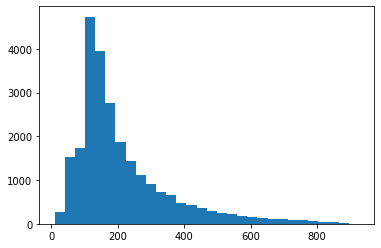

In [ ]:
plt.hist(lengths, bins=30) # printa um historiograma

In [ ]:
# https://stackoverflow.com/questions/42943291/what-does-keras-io-preprocessing-sequence-pad-sequences-do
padded_val_tokens = pad_sequences(val_tokens, maxlen=850) 
padded_test_tokens = pad_sequences(test_tokens, maxlen=850)
padded_train_tokens = pad_sequences(train_tokens, maxlen=850)

In [ ]:
# https://rdrr.io/cran/keras/man/to_categorical.html
train_label = to_categorical(data_train['target'], num_classes=len(classes))
val_label = to_categorical(data_val['target'], num_classes=len(classes))
test_label = to_categorical(data_test['target'], num_classes=len(classes))

## Modelo

In [ ]:
inputs = keras.Input(shape=(850,)) 
embed = Embedding(20000, output_dim=300)(inputs) 
lstm = LSTM(256, return_sequences=True)(embed)
pooling = GlobalMaxPool1D()(lstm) 
classification = Dense(2, activation='softmax')(pooling) # N x 2 # Saida do modelo, o mesmo gera 2 saidas de dados, uma para positivo e outra para negativo

In [ ]:
model = Model(inputs=inputs, outputs=classification)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 850)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 850, 300)          6000000   
                                                                 
 lstm_1 (LSTM)               (None, 850, 256)          570368    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 6,570,882
Trainable params: 6,570,882
Non-trainable params: 0
_________________________________________________

In [ ]:
epochs = 30 # 100 
learning_rate = 0.04 # Taxa de aprendizado # 0.001

# Definindo o tamanho dos batchs
batch_size = 512

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(
    optimizer=optimizer, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
padded_train_tokens.shape, train_label.shape

((24729, 850), (24729, 2))

## Treinamento

In [ ]:
history = model.fit(x=padded_train_tokens, y=train_label, batch_size=batch_size, epochs=epochs)

Epoch 1/30
49/49 [==============================] - 22s 388ms/step - loss: 1.9147 - accuracy: 0.5637
Epoch 2/30
49/49 [==============================] - 19s 389ms/step - loss: 0.7060 - accuracy: 0.6732
Epoch 3/30
49/49 [==============================] - 19s 389ms/step - loss: 0.5594 - accuracy: 0.7308
Epoch 4/30
49/49 [==============================] - 19s 389ms/step - loss: 0.5004 - accuracy: 0.7615
Epoch 5/30
49/49 [==============================] - 19s 389ms/step - loss: 0.4798 - accuracy: 0.7724
Epoch 6/30
49/49 [==============================] - 19s 388ms/step - loss: 0.4443 - accuracy: 0.7969
Epoch 7/30
49/49 [==============================] - 19s 389ms/step - loss: 0.4246 - accuracy: 0.8055
Epoch 8/30
49/49 [==============================] - 19s 389ms/step - loss: 0.4064 - accuracy: 0.8191
Epoch 9/30
49/49 [==============================] - 19s 389ms/step - loss: 0.4025 - accuracy: 0.8196
Epoch 10/30
49/49 [==============================] - 19s 389ms/step - loss: 0.3911 - accura

In [ ]:
print(history.history)

{'loss': [0.6886494755744934, 0.41612812876701355, 0.3280583918094635, 0.30362382531166077, 0.2615424692630768, 0.23930644989013672, 0.21929264068603516, 0.19723348319530487, 0.18007661402225494, 0.18091043829917908, 0.19916293025016785, 0.19909313321113586, 0.200185164809227, 0.17667849361896515, 0.18716783821582794, 0.18293343484401703, 0.17327484488487244, 0.17949457466602325, 0.18677829205989838, 0.1739317625761032, 0.16344156861305237, 0.1596291959285736, 0.15782983601093292, 0.1509893238544464, 0.14522390067577362, 0.14690791070461273, 0.1736321598291397, 0.13077236711978912, 0.12773948907852173, 0.14353567361831665], 'accuracy': [0.662218451499939, 0.8143879771232605, 0.8608920574188232, 0.8718913197517395, 0.8901694416999817, 0.9038376212120056, 0.9106312394142151, 0.9202960133552551, 0.9289093613624573, 0.9285858869552612, 0.9196085333824158, 0.9192445874214172, 0.9218326807022095, 0.9300416707992554, 0.9247846603393555, 0.9288284778594971, 0.9313760995864868, 0.92745357751846

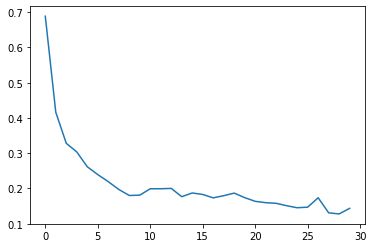

In [ ]:
plt.plot(history.history['loss'])
plt.show()

## Salvar o modelo

In [ ]:
# modelo_nome = 'Modelo_1__11_01_2021_epochs_30' => ultimo
#modelo_nome = 'Modelo_1__11_01_2021_epochs_5'

modelo_nome = 'Modelo_1__20_02_2022_epochs_' + str(epochs)

In [ ]:
model.save(path_root_out + modelo_nome)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/Modelo_1__20_02_2022_epochs_30/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/1. Pós Ciência de Dados/1. Trabalho de Conclusão/Testes/Extrair Dados/Dados/Modelo_1__20_02_2022_epochs_30/assets


## Carregar o modelo

In [ ]:
model = keras.models.load_model(path_root_out + modelo_nome)

## Teste

In [ ]:
class PredicModel:

  def __init__(self, model, tokenizer, classes):
    self.model = model
    self.tokenizer = tokenizer
    self.classes = classes

  def prediction(self, text: list):
    tokens = self.tokenizer.texts_to_sequences(text) 
    tokens = pad_sequences(tokens, maxlen=850)
    preds = self.model.predict(tokens)
    pred_class_prediction = preds.argmax(1)
    classes = [self.classes[pred] for pred in pred_class_prediction]
    return preds, classes

In [ ]:
predictor = PredicModel(model, tokenizerText.get_tokenizer(), classes)

In [ ]:
testes = ['Esse governo está no início, vamos ver o que vai dar',
         'Estou muito feliz com o governo de Minas esse ano',
         'O estado de Minas Gerais decretou calamidade financeira!!!',
         'A segurança desse país é muio ruim',
         'O governador de Minas é bom',
         'Eu sou bonito!']

In [ ]:
predictions = predictor.prediction(testes)
predictions

(array([[1.9266898e-03, 9.9807334e-01],
        [1.3699020e-01, 8.6300981e-01],
        [7.6158470e-01, 2.3841527e-01],
        [9.9997413e-01, 2.5840754e-05],
        [1.5555466e-06, 9.9999845e-01],
        [1.6301826e-03, 9.9836987e-01]], dtype=float32), [1, 1, 0, 0, 1, 1])

In [ ]:
predictions[1]

[1, 1, 0, 0, 1, 1]

## Avaliação

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
tokenizerText_test = TokenizerText(data_test['text'])

In [ ]:
predictor_test = PredicModel(model, tokenizerText_test.get_tokenizer(), data_test['target'].tolist())
predictor_test

In [ ]:
predictions_test = predictor_test.prediction(data_test['text'].tolist())
type(predictions_test)

tuple

In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(data_test['target'].tolist(), predictions_test[1], average='binary')
print('precision:', precision, 'recall:', recall, 'fscore:', fscore)

precision: 0.47882814376050586 recall: 0.4867371847030106 fscore: 0.4827502723641206


In [ ]:
evaluate_ = model.evaluate(x=padded_val_tokens, y=val_label, batch_size=epochs)

495/495 [==============================] - 13s 25ms/step - loss: 0.4814 - accuracy: 0.8088


In [ ]:
evaluate_

## DataSet - NPS

In [ ]:
df_output_nps_comentario = df_output_nps['Comentário'].tolist()

In [ ]:
type(df_output_nps_comentario)

list

In [ ]:
df_output_nps_comentario = [str(item) for item in df_output_nps_comentario]

In [ ]:
predictions_nps = predictor.prediction(df_output_nps_comentario)
#len(predictions_nps[1])
len(predictions_nps)

2

In [ ]:
len(predictions_nps[1])

10325

In [ ]:
#print(len(predictions_nps[0]), len(predictions_nps[1]))

In [ ]:
df_output_nps['Keras_30'] = predictions_nps[1]
#df_output_nps['Keras_30'] = predictions_nps[1]
#df_output_nps['Keras'] = predictions_nps[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_output_nps

,Unnamed: 0,Requisição,Nota,Comentário,Responsável,Mês,MultinomialNB,Keras_30
4,4,1618927694557_277,10,excelente,Larissa Siqueira,NaN,1,1
6,6,1618933026635_356,10,Muito atenciosa!,Larissa Siqueira,NaN,1,1
9,9,1618951091520_773,10,ótimo atendimento,Larissa Siqueira,NaN,1,1
42,42,1621455095064_757,10,muito prestativa,Larissa Siqueira,NaN,1,1
47,47,1621532200459_511,10,Ótimo atendimento e agilidade nas respostas!,Larissa Siqueira,NaN,1,1
...,...,...,...,...,...,...,...,...
27754,719,345198,10,"OTIM ATENDIMENTO, MUITO EFICAZ !!",Gabriel Letelier,MAIO,1,1
27755,720,345183,10,Muito obrigada pelo bom atendimento,Luis Henrique de Oliveira,MAIO,1,1
27756,721,339210,10,10,Gabriel Letelier,MAIO,1,1
27757,722,344020,10,Excelente atendimento!,Fernando Teixeira,MAIO,1,1


#DataSet - NPS

In [ ]:
df_name = 'df_output_nps.xlsx'

In [ ]:
#save_to_excel(df_output_nps, df_name)

In [ ]:
df_output_nps_ = open_to_excel(df_name)

In [ ]:
# pip install openpyxl==3.0.0

In [ ]:
df_output_nps_

,Unnamed: 0,Unnamed: 0.1,Requisição,Nota,Comentário,Responsável,Mês,MultinomialNB,Keras_30
0,4,4,1618927694557_277,10,excelente,Larissa Siqueira,NaN,1,1
1,6,6,1618933026635_356,10,Muito atenciosa!,Larissa Siqueira,NaN,1,1
2,9,9,1618951091520_773,10,ótimo atendimento,Larissa Siqueira,NaN,1,1
3,42,42,1621455095064_757,10,muito prestativa,Larissa Siqueira,NaN,1,1
4,47,47,1621532200459_511,10,Ótimo atendimento e agilidade nas respostas!,Larissa Siqueira,NaN,1,1
...,...,...,...,...,...,...,...,...,...
10320,27754,719,345198,10,"OTIM ATENDIMENTO, MUITO EFICAZ !!",Gabriel Letelier,MAIO,1,1
10321,27755,720,345183,10,Muito obrigada pelo bom atendimento,Luis Henrique de Oliveira,MAIO,1,1
10322,27756,721,339210,10,10,Gabriel Letelier,MAIO,1,1
10323,27757,722,344020,10,Excelente atendimento!,Fernando Teixeira,MAIO,1,1


In [ ]:
df_output_nps_.shape

(10325, 9)

In [ ]:
# Converte a coluna 'Nota' para INT
df_output_nps_['Nota'] = pd.to_numeric(df_output_nps_['Nota'], errors='coerce').fillna(0).astype(np.int64)

In [ ]:
###############################################################################################
# Promotores nota de (9 e 10)

In [ ]:
promotores_total = df_output_nps_.query('Nota >= 9 ')
promotores_total.shape

(9877, 9)

In [ ]:
# Promotores (9 e 10) (MultinomialNB) = Positivos
promotores_MultinomialNB_pos = df_output_nps_.query('Nota >= 9 and MultinomialNB == 1 ')
promotores_MultinomialNB_pos.shape

(7196, 9)

In [ ]:
# Promotores (9 e 10) (Keras_30) = Positivos
promotores_Keras_pos = df_output_nps_.query('Nota >= 9 and Keras_30 == 1 ')
promotores_Keras_pos.shape

(7294, 9)

In [ ]:
# Promotores (9 e 10) (MultinomialNB/Keras_30)  = Positivos
promotores_MultinomialNB_Keras_pos = df_output_nps_.query('Nota >= 9 and MultinomialNB == 1 and Keras_30 == 1 ')
promotores_MultinomialNB_Keras_pos.shape

(7196, 9)

In [ ]:
# Promotores (9 e 10) (MultinomialNB) = Negativos
promotores_MultinomialNB_neg = df_output_nps_.query('Nota >= 9 and MultinomialNB == 0 ')
promotores_MultinomialNB_neg.shape

(2681, 9)

In [ ]:
# Promotores (9 e 10) (Keras_30) = Negativos
promotores_Keras_neg = df_output_nps_.query('Nota >= 9 and Keras_30 == 0 ')
promotores_Keras_neg.shape

(2583, 9)

In [ ]:
# Promotores (9 e 10) (MultinomialNB/Keras_30) = Negativos
promotores_MultinomialNB_Keras_neg = df_output_nps_.query('Nota >= 9 and MultinomialNB == 0 and Keras_30 == 0 ')
promotores_MultinomialNB_Keras_neg.shape

(1262, 9)

In [ ]:
# Promotores (9 e 10) (MultinomialNB/Keras_30)  = Diferença
promotores_MultinomialNB_Keras_pos = df_output_nps_.query('Nota >= 9 and MultinomialNB != Keras_30 ')
promotores_MultinomialNB_Keras_pos.shape

(2740, 9)

In [ ]:
###############################################################################################
# Passivos nota de (7 e 8)

In [ ]:
passivos_total = df_output_nps_.query('Nota >= 7 and Nota <= 8 ')
passivos_total.shape

(197, 9)

In [ ]:
# Passivos (7 e 8) (MultinomialNB) = Positivos
passivos_MultinomialNB_pos = df_output_nps_.query('Nota >= 7 and Nota <= 8 and MultinomialNB == 1 ')
passivos_MultinomialNB_pos.shape

(101, 9)

In [ ]:
# Passivos (7 e 8) (Keras_30) = Positivos
passivos_Keras_pos = df_output_nps_.query('Nota >= 7 and Nota <= 8  and Keras_30 == 1 ')
passivos_Keras_pos.shape

(128, 9)

In [ ]:
# Passivos (7 e 8) (MultinomialNB/Keras_30)  = Positivos
passivos_MultinomialNB_Keras_pos = df_output_nps_.query('Nota >= 7 and Nota <= 8  and MultinomialNB == 1 and Keras_30 == 1 ')
passivos_MultinomialNB_Keras_pos.shape

(77, 9)

In [ ]:
# Passivos (7 e 8) (MultinomialNB) = Negativos
passivos_MultinomialNB_neg = df_output_nps_.query('Nota >= 7 and Nota <= 8 and MultinomialNB == 0 ')
passivos_MultinomialNB_neg.shape

(96, 9)

In [ ]:
# Passivos (7 e 8) (Keras_30) = Negativos
passivos_Keras_neg = df_output_nps_.query('Nota >= 7 and Nota <= 8 and Keras_30 == 0 ')
passivos_Keras_neg.shape

(69, 9)

In [ ]:
# Passivos (7 e 8) (MultinomialNB/Keras_30) = Negativos
passivos_MultinomialNB_Keras_neg = df_output_nps_.query('Nota >= 7 and Nota <= 8 and MultinomialNB == 0 and Keras_30 == 0 ')
passivos_MultinomialNB_Keras_neg.shape

(96, 9)

In [ ]:
# Passivos (7 e 8) (MultinomialNB/Keras_30) = Diferença
passivos_MultinomialNB_Keras_neg = df_output_nps_.query('Nota >= 7 and Nota <= 8 and MultinomialNB != Keras_30 ')
passivos_MultinomialNB_Keras_neg.shape

(75, 9)

In [ ]:
###############################################################################################
# Detratores (nota de 0 a 6)

In [ ]:
detratores_total = df_output_nps_.query('Nota >= 0 and Nota <= 6 ')
detratores_total.shape

(251, 9)

In [ ]:
# Detratores (0 a 6) (MultinomialNB) = Positivos
detratores_MultinomialNB_pos = df_output_nps_.query('Nota >= 0 and Nota <= 6 and MultinomialNB == 1 ')
detratores_MultinomialNB_pos.shape

(51, 9)

In [ ]:
# Detratores (0 a 6) (Keras_30) = Positivos
detratores_Keras_pos = df_output_nps_.query('Nota >= 0 and Nota <= 6 and Keras_30 == 1 ')
detratores_Keras_pos.shape

(99, 9)

In [ ]:
# Detratores (0 a 6) (MultinomialNB/Keras_30)  = Positivos
detratores_MultinomialNB_Keras_pos = df_output_nps_.query('Nota >= 0 and Nota <= 6 and MultinomialNB == 1 and Keras_30 == 1 ')
detratores_MultinomialNB_Keras_pos.shape

(34, 9)

In [ ]:
# Detratores (0 a 6) (MultinomialNB) = Negativos
detratores_MultinomialNB_neg = df_output_nps_.query('Nota >= 0 and Nota <= 6 and MultinomialNB == 0 ')
detratores_MultinomialNB_neg.shape

(200, 9)

In [ ]:
# Detratores (0 a 6) (Keras_30) = Negativos
detratores_Keras_neg = df_output_nps_.query('Nota >= 0 and Nota <= 6 and Keras_30 == 0 ')
detratores_Keras_neg.shape

(152, 9)

In [ ]:
# Detratores (0 a 6) (MultinomialNB/Keras_30) = Negativos
detratores_MultinomialNB_Keras_neg = df_output_nps_.query('Nota >= 0 and Nota <= 6 and MultinomialNB == 0 and Keras_30 == 0 ')
detratores_MultinomialNB_Keras_neg.shape

(135, 9)

In [ ]:
# Detratores (0 a 6) (MultinomialNB/Keras_30) = Diferença
detratores_MultinomialNB_Keras_neg = df_output_nps_.query('Nota >= 0 and Nota <= 6 and MultinomialNB != Keras_30 ')
detratores_MultinomialNB_Keras_neg.shape

(82, 9)